In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/30-yrs-stock-market-data/30_yr_stock_market_info.csv
/kaggle/input/30-yrs-stock-market-data/30_yr_stock_market_data.csv


In [2]:
# Read the info file

df_info = pd.read_csv('/kaggle/input/30-yrs-stock-market-data/30_yr_stock_market_info.csv')

df_info.head(5)

,SYMBOL,SYMBOL_NAME,SYMBOL_TYPE,SYMBOL_NAME_FULL,UNIT
0,^DJI,Dow Jones,Market Index,Dow Jones (^DJI),index
1,^IXIC,Nasdaq,Market Index,Nasdaq (^IXIC),index
2,^GSPC,S&P500,Market Index,S&P500 (^GSPC),index
3,^NYA,NYSE Composite,Market Index,NYSE Composite (^NYA),index
4,^RUT,Russell 2000,Market Index,Russell 2000 (^RUT),index


In [3]:
# Get the shape of the info dataset

df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SYMBOL            32 non-null     object
 1   SYMBOL_NAME       32 non-null     object
 2   SYMBOL_TYPE       32 non-null     object
 3   SYMBOL_NAME_FULL  32 non-null     object
 4   UNIT              32 non-null     object
dtypes: object(5)
memory usage: 1.4+ KB


In [4]:
# Check which markets and commodities are included

symbol_list = df_info['SYMBOL_NAME'].tolist()

print(symbol_list)

['Dow Jones', 'Nasdaq', 'S&P500', 'NYSE Composite', 'Russell 2000', 'CBOE Volitility', 'DAX Index', 'FTSE 100', 'Hang Seng Index', 'Cocoa', 'Coffee', 'Corn', 'Cotton', 'Live Cattle', 'Orange Juice', 'Soybeans', 'Sugar', 'Wheat', 'Ethanol', 'Heating Oil', 'Natural Gas', 'Crude Oil-Brent', 'Crude Oil-WTI', 'Copper', 'Gold', 'Palladium', 'Platinum', 'Silver', 'Treasury Yield 5 Years', 'Treasury Bill 13 Week', 'Treasury Yield 10 Years', 'Treasury Yield 30 Years']


In [5]:
df_market_data = pd.read_csv('/kaggle/input/30-yrs-stock-market-data/30_yr_stock_market_data.csv')



df_market_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7754 entries, 0 to 7753
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            7754 non-null   object 
 1   Dow Jones (^DJI)                7555 non-null   float64
 2   Nasdaq (^IXIC)                  7555 non-null   float64
 3   S&P500 (^GSPC)                  7555 non-null   float64
 4   NYSE Composite (^NYA)           7555 non-null   float64
 5   Russell 2000 (^RUT)             7555 non-null   float64
 6   CBOE Volitility (^VIX)          7555 non-null   float64
 7   DAX Index (^GDAXI)              7604 non-null   float64
 8   FTSE 100 (^FTSE)                7578 non-null   float64
 9   Hang Seng Index (^HSI)          7402 non-null   float64
 10  Cocoa (CC=F)                    5995 non-null   float64
 11  Coffee (KC=F)                   5992 non-null   float64
 12  Corn (ZC=F)                     58

In [6]:
# Convert Date to datetime
df_market_data['Date']= pd.to_datetime(df_market_data['Date'])


In [7]:
df_market_data.head()

,Date,Dow Jones (^DJI),Nasdaq (^IXIC),S&P500 (^GSPC),NYSE Composite (^NYA),Russell 2000 (^RUT),CBOE Volitility (^VIX),DAX Index (^GDAXI),FTSE 100 (^FTSE),Hang Seng Index (^HSI),...,Crude Oil-WTI (CL=F),Copper (HG=F),Gold (GC=F),Palladium (PA=F),Platinum (PL=F),Silver (SI=F),Treasury Yield 5 Years (^FVX),Treasury Bill 13 Week (^IRX),Treasury Yield 10 Years (^TNX),Treasury Yield 30 Years (^TYX)
0,1993-11-29,3677.800049,751.539978,461.899994,2697.040039,250.139999,14.12,2052.090088,3135.800049,9012.799805,...,NaN,NaN,NaN,NaN,NaN,NaN,5.075,3.11,5.732,6.226
1,1993-11-30,3683.949951,754.390015,461.790009,2694.080078,250.410004,13.76,2052.919922,3166.899902,9125.200195,...,NaN,NaN,NaN,NaN,NaN,NaN,5.146,3.14,5.795,6.286
2,1993-12-01,3697.080078,763.809998,461.890015,2699.159912,252.610001,13.83,2089.770020,3233.199951,9254.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,5.132,3.11,5.783,6.268
3,1993-12-02,3702.110107,766.729980,463.109985,2705.179932,252.910004,13.51,2099.760010,3223.899902,9238.200195,...,NaN,NaN,NaN,NaN,NaN,NaN,5.146,3.11,5.778,6.263
4,1993-12-03,3704.070068,772.219971,464.890015,2714.699951,253.860001,12.69,2128.300049,3234.199951,9294.400391,...,NaN,NaN,NaN,NaN,NaN,NaN,5.175,3.11,5.783,6.258


In [8]:
market_list = df_market_data.columns.to_list()

print(market_list)

['Date', 'Dow Jones (^DJI)', 'Nasdaq (^IXIC)', 'S&P500 (^GSPC)', 'NYSE Composite (^NYA)', 'Russell 2000 (^RUT)', 'CBOE Volitility (^VIX)', 'DAX Index (^GDAXI)', 'FTSE 100 (^FTSE)', 'Hang Seng Index (^HSI)', 'Cocoa (CC=F)', 'Coffee (KC=F)', 'Corn (ZC=F)', 'Cotton (CT=F)', 'Live Cattle (LE=F)', 'Orange Juice (OJ=F)', 'Soybeans (ZS=F)', 'Sugar (SB=F)', 'Wheat (ZW=F)', 'Ethanol (EH=F)', 'Heating Oil (HO=F)', 'Natural Gas (NG=F)', 'Crude Oil-Brent (BZ=F)', 'Crude Oil-WTI (CL=F)', 'Copper (HG=F)', 'Gold (GC=F)', 'Palladium (PA=F)', 'Platinum (PL=F)', 'Silver (SI=F)', 'Treasury Yield 5 Years (^FVX)', 'Treasury Bill 13 Week (^IRX)', 'Treasury Yield 10 Years (^TNX)', 'Treasury Yield 30 Years (^TYX)']


In [9]:
# Get market correlation for markets

df_market_data[['Dow Jones (^DJI)', 'Nasdaq (^IXIC)', 'S&P500 (^GSPC)', 'NYSE Composite (^NYA)', 'Russell 2000 (^RUT)', 
                'CBOE Volitility (^VIX)', 'DAX Index (^GDAXI)', 'FTSE 100 (^FTSE)', 'Hang Seng Index (^HSI)']].corr()

,Dow Jones (^DJI),Nasdaq (^IXIC),S&P500 (^GSPC),NYSE Composite (^NYA),Russell 2000 (^RUT),CBOE Volitility (^VIX),DAX Index (^GDAXI),FTSE 100 (^FTSE),Hang Seng Index (^HSI)
Dow Jones (^DJI),1.000000,0.973833,0.993330,0.974454,0.979816,-0.072872,0.964916,0.809164,0.711833
Nasdaq (^IXIC),0.973833,1.000000,0.988852,0.920695,0.947776,-0.034480,0.922826,0.718896,0.617426
S&P500 (^GSPC),0.993330,0.988852,1.000000,0.960523,0.966335,-0.061209,0.953724,0.790281,0.657773
NYSE Composite (^NYA),0.974454,0.920695,0.960523,1.000000,0.976010,-0.123620,0.975597,0.881944,0.798088
Russell 2000 (^RUT),0.979816,0.947776,0.966335,0.976010,1.000000,-0.150404,0.966482,0.804354,0.779283
CBOE Volitility (^VIX),-0.072872,-0.034480,-0.061209,-0.123620,-0.150404,1.000000,-0.113505,-0.171288,-0.173472
DAX Index (^GDAXI),0.964916,0.922826,0.953724,0.975597,0.966482,-0.113505,1.000000,0.890934,0.800217
FTSE 100 (^FTSE),0.809164,0.718896,0.790281,0.881944,0.804354,-0.171288,0.890934,1.000000,0.778400
Hang Seng Index (^HSI),0.711833,0.617426,0.657773,0.798088,0.779283,-0.173472,0.800217,0.778400,1.000000


In [10]:
# Get market correlation for commodities

df_market_data[['Cocoa (CC=F)', 'Coffee (KC=F)', 'Corn (ZC=F)', 'Cotton (CT=F)', 'Live Cattle (LE=F)', 'Orange Juice (OJ=F)', 'Soybeans (ZS=F)', 
                'Sugar (SB=F)', 'Wheat (ZW=F)', 'Ethanol (EH=F)', 'Heating Oil (HO=F)', 'Natural Gas (NG=F)', 'Crude Oil-Brent (BZ=F)', 'Crude Oil-WTI (CL=F)', 
                'Copper (HG=F)', 'Gold (GC=F)', 'Palladium (PA=F)', 'Platinum (PL=F)', 'Silver (SI=F)']].corr()

,Cocoa (CC=F),Coffee (KC=F),Corn (ZC=F),Cotton (CT=F),Live Cattle (LE=F),Orange Juice (OJ=F),Soybeans (ZS=F),Sugar (SB=F),Wheat (ZW=F),Ethanol (EH=F),Heating Oil (HO=F),Natural Gas (NG=F),Crude Oil-Brent (BZ=F),Crude Oil-WTI (CL=F),Copper (HG=F),Gold (GC=F),Palladium (PA=F),Platinum (PL=F),Silver (SI=F)
Cocoa (CC=F),1.000000,0.618486,0.554213,0.492303,0.598579,0.881734,0.656070,0.664960,0.547575,-0.029224,0.524997,-0.341234,0.080297,0.499865,0.605441,0.701263,0.296482,0.579034,0.646596
Coffee (KC=F),0.618486,1.000000,0.789969,0.803920,0.552985,-0.732478,0.763992,0.817560,0.717715,0.480090,0.759093,-0.064625,0.552911,0.715937,0.795666,0.724433,0.358503,0.663545,0.830744
Corn (ZC=F),0.554213,0.789969,1.000000,0.718393,0.522741,-0.521513,0.923286,0.691880,0.878134,0.548706,0.818043,-0.105192,0.715145,0.746031,0.795995,0.772391,0.452360,0.640973,0.860219
Cotton (CT=F),0.492303,0.803920,0.718393,1.000000,0.401352,-0.633237,0.685652,0.694598,0.637458,0.352741,0.639744,-0.095576,0.517336,0.606073,0.686593,0.619055,0.391813,0.557038,0.734852
Live Cattle (LE=F),0.598579,0.552985,0.522741,0.401352,1.000000,0.918763,0.621701,0.493147,0.425722,0.045151,0.550341,-0.381482,0.150486,0.381411,0.544808,0.721760,0.461615,0.174452,0.542285
Orange Juice (OJ=F),0.881734,-0.732478,-0.521513,-0.633237,0.918763,1.000000,-0.209657,0.890244,-0.640499,-0.302886,-0.085791,-0.581465,-0.257910,-0.271072,-0.515486,0.540465,-0.856277,-0.255126,0.133510
Soybeans (ZS=F),0.656070,0.763992,0.923286,0.685652,0.621701,-0.209657,1.000000,0.689309,0.867347,0.436542,0.823001,-0.142365,0.722570,0.765962,0.803511,0.813629,0.479090,0.645566,0.826235
Sugar (SB=F),0.664960,0.817560,0.691880,0.694598,0.493147,0.890244,0.689309,1.000000,0.545096,0.455302,0.645875,-0.226459,0.406760,0.616708,0.728071,0.715969,0.279268,0.676572,0.818003
Wheat (ZW=F),0.547575,0.717715,0.878134,0.637458,0.425722,-0.640499,0.867347,0.545096,1.000000,0.445979,0.809380,0.054575,0.653223,0.770742,0.795911,0.677000,0.476585,0.639500,0.717293
Ethanol (EH=F),-0.029224,0.480090,0.548706,0.352741,0.045151,-0.302886,0.436542,0.455302,0.445979,1.000000,0.637761,0.413801,0.820052,0.690401,0.578652,0.044043,-0.119703,0.596849,0.423690


In [11]:
# Get market correlation for commodities, remove null values

df_commodities_cleaned = df_market_data.dropna()

df_commodities_cleaned[['Cocoa (CC=F)', 'Coffee (KC=F)', 'Corn (ZC=F)', 'Cotton (CT=F)', 'Live Cattle (LE=F)', 'Orange Juice (OJ=F)', 'Soybeans (ZS=F)', 
                'Sugar (SB=F)', 'Wheat (ZW=F)', 'Ethanol (EH=F)', 'Heating Oil (HO=F)', 'Natural Gas (NG=F)', 'Crude Oil-Brent (BZ=F)', 'Crude Oil-WTI (CL=F)', 
                'Copper (HG=F)', 'Gold (GC=F)', 'Palladium (PA=F)', 'Platinum (PL=F)', 'Silver (SI=F)']].corr()


,Cocoa (CC=F),Coffee (KC=F),Corn (ZC=F),Cotton (CT=F),Live Cattle (LE=F),Orange Juice (OJ=F),Soybeans (ZS=F),Sugar (SB=F),Wheat (ZW=F),Ethanol (EH=F),Heating Oil (HO=F),Natural Gas (NG=F),Crude Oil-Brent (BZ=F),Crude Oil-WTI (CL=F),Copper (HG=F),Gold (GC=F),Palladium (PA=F),Platinum (PL=F),Silver (SI=F)
Cocoa (CC=F),1.000000,-0.606085,-0.683025,-0.477600,0.810725,0.880221,-0.325783,0.925717,-0.652746,-0.114125,-0.301845,-0.667089,-0.332430,-0.305687,-0.227920,0.675871,-0.787190,-0.124976,0.400722
Coffee (KC=F),-0.606085,1.000000,0.507002,0.759968,-0.743212,-0.731849,0.318653,-0.642247,0.624389,0.034100,0.158612,0.523540,0.418999,0.442531,0.454056,-0.294524,0.721823,0.033348,-0.139563
Corn (ZC=F),-0.683025,0.507002,1.000000,0.527229,-0.468390,-0.527882,0.783734,-0.593680,0.826895,-0.278703,0.573808,0.501288,0.604253,0.575461,0.281129,-0.172571,0.629351,0.190770,-0.145881
Cotton (CT=F),-0.477600,0.759968,0.527229,1.000000,-0.689095,-0.635425,0.455663,-0.548221,0.772639,0.097185,0.383366,0.602281,0.651220,0.702309,0.627462,-0.123497,0.680079,0.055908,0.060410
Live Cattle (LE=F),0.810725,-0.743212,-0.468390,-0.689095,1.000000,0.919888,-0.173653,0.856490,-0.658996,-0.384139,-0.175892,-0.698506,-0.357260,-0.374748,-0.464075,0.569129,-0.835127,-0.111576,0.201687
Orange Juice (OJ=F),0.880221,-0.731849,-0.527882,-0.635425,0.919888,1.000000,-0.211844,0.888050,-0.644229,-0.313544,-0.091275,-0.580742,-0.263768,-0.276921,-0.507832,0.531268,-0.854787,-0.255943,0.121324
Soybeans (ZS=F),-0.325783,0.318653,0.783734,0.455663,-0.173653,-0.211844,1.000000,-0.343369,0.660656,-0.452009,0.618449,0.370567,0.696663,0.665997,0.206044,0.129722,0.403406,0.050764,-0.035599
Sugar (SB=F),0.925717,-0.642247,-0.593680,-0.548221,0.856490,0.888050,-0.343369,1.000000,-0.661057,-0.132067,-0.333204,-0.698153,-0.374415,-0.351937,-0.303497,0.692467,-0.823626,-0.036982,0.389777
Wheat (ZW=F),-0.652746,0.624389,0.826895,0.772639,-0.658996,-0.644229,0.660656,-0.661057,1.000000,-0.063635,0.598265,0.643559,0.747447,0.749428,0.468851,-0.236391,0.775705,0.117923,-0.067750
Ethanol (EH=F),-0.114125,0.034100,-0.278703,0.097185,-0.384139,-0.313544,-0.452009,-0.132067,-0.063635,1.000000,-0.341966,0.091153,-0.222866,-0.182417,0.263252,-0.181231,0.161873,0.185688,0.163974


## Use Matplotlib to Explore the data further

In [12]:
# Import library
%matplotlib inline 
import matplotlib.pyplot as plt

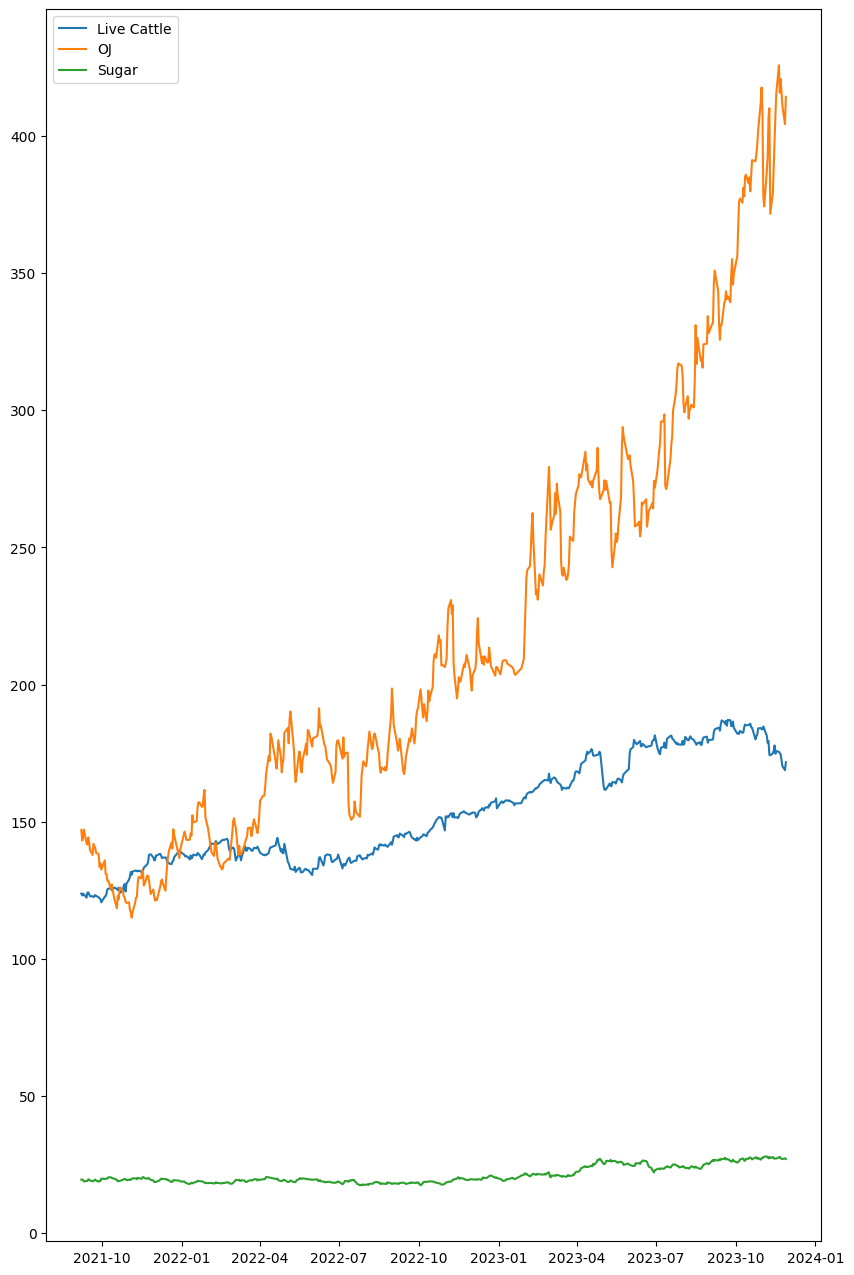

In [13]:
# Create figure and plots
fig, ax = plt.subplots(figsize=(10,16))

ax.plot(df_commodities_cleaned['Date'],df_commodities_cleaned['Live Cattle (LE=F)'], label='Live Cattle')
ax.plot(df_commodities_cleaned['Date'],df_commodities_cleaned['Orange Juice (OJ=F)'], label='OJ')
ax.plot(df_commodities_cleaned['Date'],df_commodities_cleaned['Sugar (SB=F)'], label='Sugar')

handles, labels = ax.get_legend_handles_labels()

ax.legend(handles, labels,)

In [14]:
df_market_data.corr()['S&P500 (^GSPC)'].sort_values(ascending=False)

S&P500 (^GSPC)                    1.000000
Dow Jones (^DJI)                  0.993330
Nasdaq (^IXIC)                    0.988852
Russell 2000 (^RUT)               0.966335
NYSE Composite (^NYA)             0.960523
DAX Index (^GDAXI)                0.953724
Palladium (PA=F)                  0.883632
Date                              0.862179
FTSE 100 (^FTSE)                  0.790281
Gold (GC=F)                       0.732180
Hang Seng Index (^HSI)            0.657773
Live Cattle (LE=F)                0.648409
Copper (HG=F)                     0.530683
Soybeans (ZS=F)                   0.483563
Corn (ZC=F)                       0.411162
Silver (SI=F)                     0.400026
Wheat (ZW=F)                      0.394474
Coffee (KC=F)                     0.375042
Cotton (CT=F)                     0.372753
Cocoa (CC=F)                      0.369271
Heating Oil (HO=F)                0.331454
Sugar (SB=F)                      0.307177
Crude Oil-WTI (CL=F)              0.162530
Orange Juic

## Clean Data for ML Models

- I'm going to drop Orange Juice for now as there are significantly less dates than for the indexes and other commodities

In [15]:
# Import Scikitlearn and tools
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import random

np.random.seed(42)

X = df_market_data.drop('S&P500 (^GSPC)', axis=1)
y = df_market_data['S&P500 (^GSPC)']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

